<a href="https://colab.research.google.com/github/MIbtehajNasar/Demotest/blob/master/Prediction_using_Supervised_Learning(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task1: Linear Regression with Python Scikit Learn**
This is the notebook is part of my internship at **The Spark Foundation** 

This is a regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [43]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"

In [4]:
#Read CSV file from the link using panadas function pd.read_csv()
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
df.shape

(25, 2)

In [11]:
#Look at the first new records of Data using head() function
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


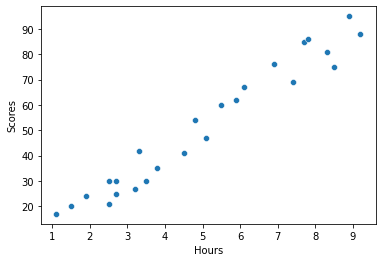

In [44]:
# Plotting the distribution of scores
sns.scatterplot(x=df['Hours'], y=df['Scores'])

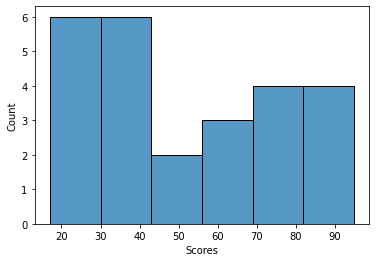

In [45]:
sns.histplot(data=df['Scores'])

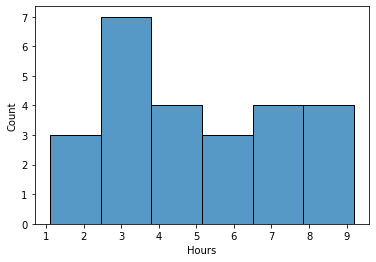

In [46]:
sns.histplot(data=df['Hours'])

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [27]:
X=df[['Hours']]
y=df['Scores']

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [29]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #Train Model 

print("Training complete.")

Training complete.


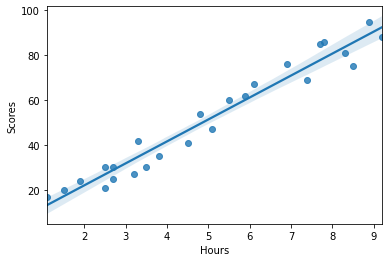

In [48]:
# Plotting the regression line
sns.regplot(x=df['Hours'], y=df['Scores'])

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [52]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [53]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


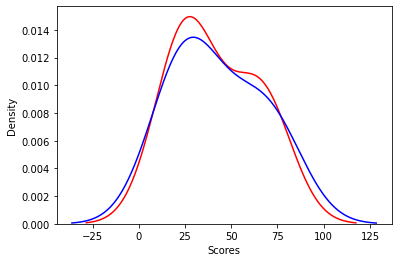

In [71]:
sns.distplot(a=y_test, hist=False, color='r')
sns.distplot(a=y_pred, hist=False, color='b')

In [72]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
